# Topic 28 - Microbes Classification

## EDA

### Libraries and Data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Structure of the dataset

Now we take a look at overall dataset structure

In [2]:
print('features:\n', df.columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

features:
 Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.

We can see that the dataset has **30527** samples and **24** features. Target will be the last column - classify each microorganism.

In [3]:
features = df.drop(columns=['microorganisms'])
target = df['microorganisms']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, stratify=target, random_state=42)

Lets now investigate what types given features have.  
As well as check if we have any missing/zero values.

In [5]:
print(x_train.info(), end='\n\n')
print(y_train.info(), end='\n\n')
print('missing values in features: ', (x_train.isna().any().any()))
print('missing values in target: ', (y_train.isna().any().any()))
print('zero values in features: ', (x_train==0.0).any().any())
print('zero values in target: ', (y_train==0.0).any().any())

<class 'pandas.core.frame.DataFrame'>
Index: 22895 entries, 1026 to 563
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         22895 non-null  float64
 1   Eccentricity     22895 non-null  float64
 2   EquivDiameter    22895 non-null  float64
 3   Extrema          22895 non-null  float64
 4   FilledArea       22895 non-null  float64
 5   Extent           22895 non-null  float64
 6   Orientation      22895 non-null  float64
 7   EulerNumber      22895 non-null  float64
 8   BoundingBox1     22895 non-null  float64
 9   BoundingBox2     22895 non-null  float64
 10  BoundingBox3     22895 non-null  float64
 11  BoundingBox4     22895 non-null  float64
 12  ConvexHull1      22895 non-null  float64
 13  ConvexHull2      22895 non-null  float64
 14  ConvexHull3      22895 non-null  float64
 15  ConvexHull4      22895 non-null  float64
 16  MajorAxisLength  22895 non-null  float64
 17  MinorAxisLength 

As we can see the dataset does not have any missing points, however, it has zero values, which needs to be investigated further.

In [6]:
x_train.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,...,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000
mean,9.675428,19.476049,3.619691,11.852826,0.414397,5.838982,11.716631,22.384860,10.906129,10.418501,...,11.033502,11.009093,1.601447,1.012370,0.826721,0.257066,11.735390,11.570452,0.795290,5.205664
std,4.053705,3.477182,2.194389,6.056433,0.853360,3.246020,6.590978,0.957234,6.105542,5.800286,...,6.102408,6.102247,1.672813,1.258192,1.157531,1.026860,6.042734,5.698949,1.152536,2.800949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,17.300000,2.170000,6.760000,0.093500,3.295000,5.950000,22.300000,5.660000,5.750000,...,5.750000,5.730000,0.634000,0.422000,0.253000,0.034950,6.560000,7.110000,0.217000,3.010000
50%,9.340000,20.700000,3.370000,12.000000,0.228000,5.250000,12.100000,22.600000,10.900000,10.100000,...,11.000000,11.000000,1.150000,0.743000,0.512000,0.085500,12.000000,11.200000,0.511000,5.290000
75%,12.600000,22.200000,4.570000,17.200000,0.432000,7.850000,17.200000,22.900000,15.800000,15.000000,...,15.900000,15.900000,2.060000,1.210000,0.960000,0.197000,16.900000,16.200000,0.929000,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


Each feature column has a minimal value of 0.0 and maximal value of 23.0, which is odd.  
Not all features (such as area) can logically take 0.0 values.  
Thus, we compute the number of zero values.

In [7]:
print('number of zero values overall: ', (x_train == 0.0).any(axis=1).sum())

number of zero values overall:  185


In [8]:
non_zero_columns = ['EquivDiameter', 'Perimeter', 'ConvexArea', 'Area', 'raddi']

In [9]:
print('number of zero values in definitely non-zero columns:', (x_train[non_zero_columns] == 0.0).any(axis=1).sum())

number of zero values in definitely non-zero columns: 43


As 43 samples is not big quantity, comparing to number of sampled in data set, we decide to delete rows, containing zeros.

In [10]:
train_df = x_train.join(y_train)
train_df = train_df[~(train_df[non_zero_columns] == 0.0).any(axis=1)]
x_train = train_df.drop('microorganisms', axis=1)
y_train = train_df['microorganisms']

In [11]:
x_train.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,...,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000
mean,9.672401,19.481833,3.623809,11.850407,0.415083,5.833755,11.713935,22.383952,10.902310,10.419235,...,11.029898,11.005443,1.603673,1.013561,0.827852,0.257513,11.732884,11.573029,0.796576,5.214549
std,4.051071,3.466934,2.194248,6.053872,0.854015,3.237470,6.594272,0.957897,6.102914,5.798144,...,6.099837,6.099662,1.673580,1.259054,1.158317,1.027774,6.040018,5.696264,1.153236,2.795478
min,0.000000,3.480000,0.027600,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009430,0.000000,0.001370,0.000013,0.000000,0.000000,0.000191,0.126000
25%,6.590000,17.300000,2.190000,6.760000,0.093800,3.290000,5.940000,22.300000,5.660000,5.760000,...,5.750000,5.730000,0.635000,0.423000,0.253000,0.035000,6.560000,7.110000,0.220000,3.110000
50%,9.340000,20.700000,3.370000,12.000000,0.228000,5.240000,12.100000,22.600000,10.900000,10.100000,...,11.000000,11.000000,1.150000,0.744000,0.514000,0.085600,12.000000,11.200000,0.511000,5.320000
75%,12.600000,22.200000,4.572500,17.200000,0.433000,7.850000,17.200000,22.900000,15.800000,15.000000,...,15.900000,15.900000,2.060000,1.210000,0.962000,0.197000,16.900000,16.200000,0.931000,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


### Duplicates

We need to see if we have any duplicates in samples.

In [12]:
#train_df = x_train.join(y_train)
print(x_train.join(y_train).duplicated().value_counts(), end='\n\n')


True     18088
False     4764
Name: count, dtype: int64



In [13]:
train_df_no_dupl = x_train.join(y_train).drop_duplicates(keep='first')

During modelling we will try different versions of data set: with and without duplicates.

### Distribution of classes

Lets investigate given classes in a more precise manner.

number of classes:  10


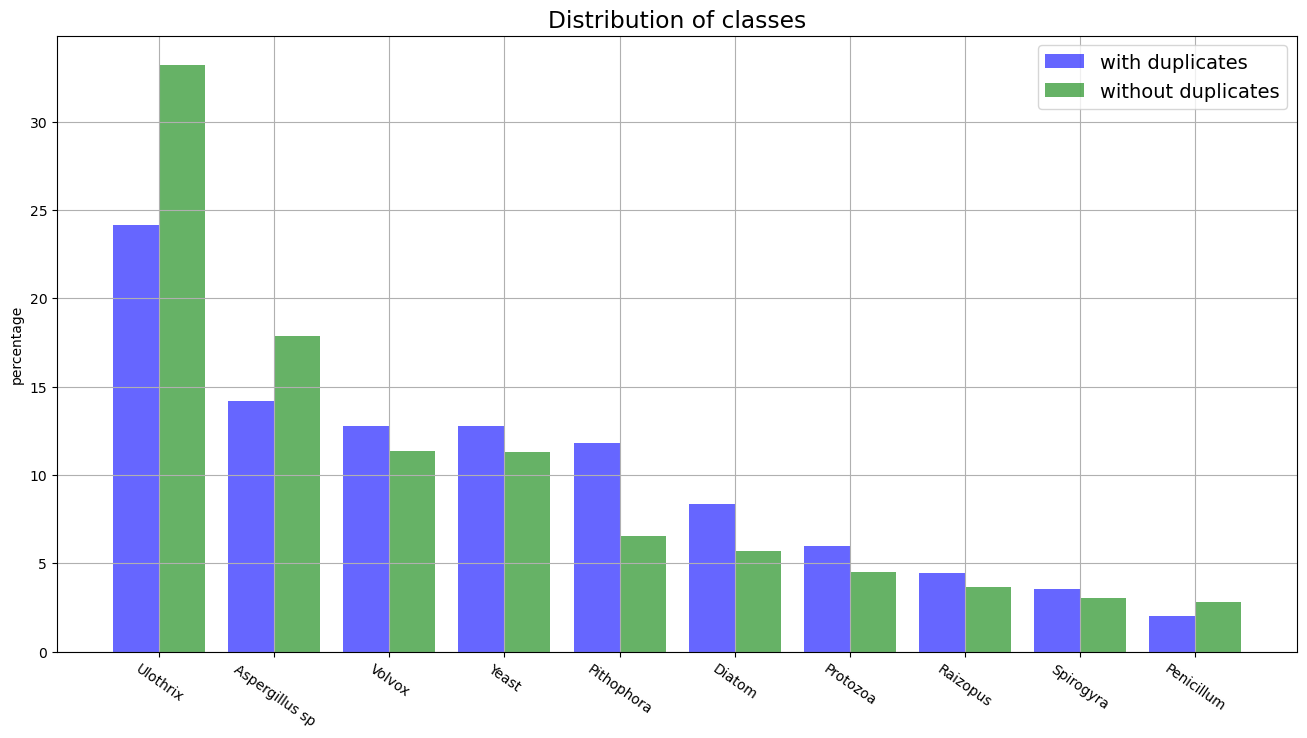

In [14]:
class_distribution = y_train.value_counts(normalize=True)*100
class_distrib_duplicates = train_df_no_dupl['microorganisms'].value_counts(normalize=True)*100

print('number of classes: ', len(class_distribution))

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.4
bars1 = ax.bar(indices, class_distribution, bar_width, label='with duplicates', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, class_distrib_duplicates, bar_width, label='without duplicates', color='green', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(class_distrib_duplicates.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

We can observe that dataset is **highly** imbalanced, that is the reason to use stratify method in train_test_split.

### Boxplots and outliers

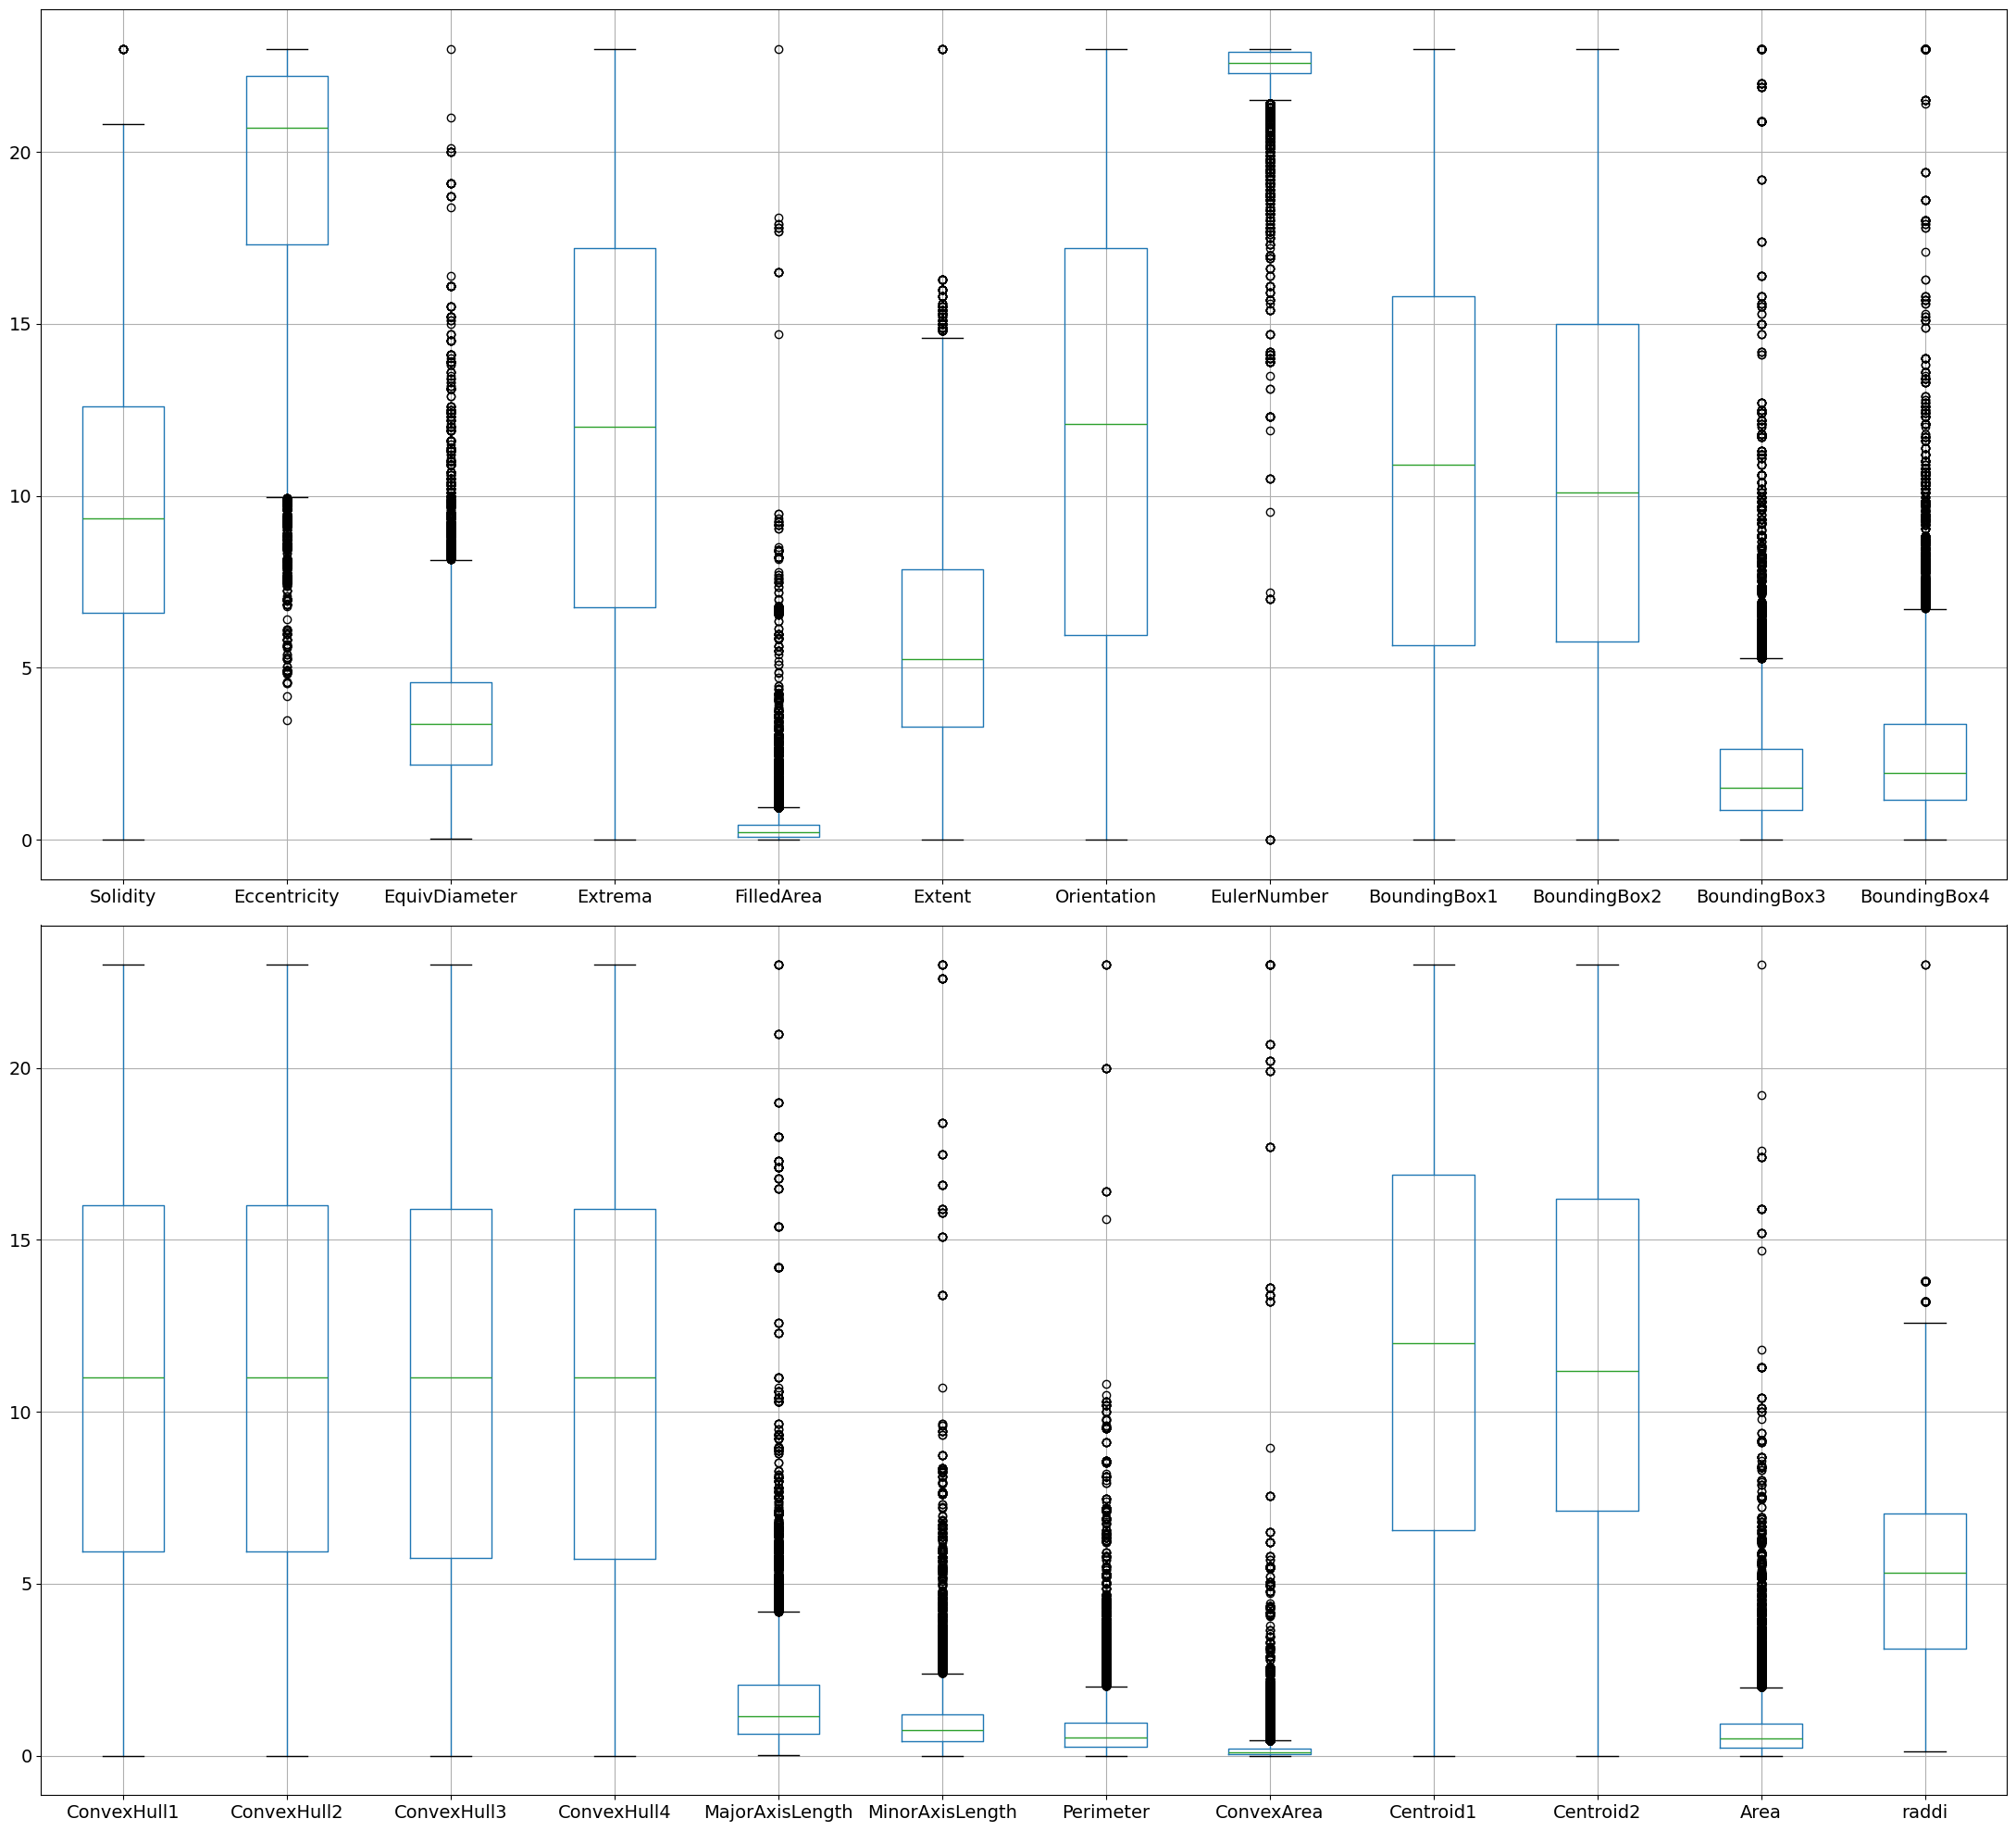

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
x_train.boxplot(ax=ax1, column=list(x_train.columns)[:12], fontsize=14)
x_train.boxplot(ax=ax2, column=list(x_train.columns)[12:], fontsize=14)
plt.tight_layout()

From the boxplots above we can clearly see that the dataset contains a lot of extreme outliers. There are different ways to calculate outliers, namely using quantiles and standart deviation.

Firstly we calculate number of outliers using quantiles.

In [16]:
q25 = x_train.quantile(q=0.25)
q50 = x_train.quantile(q=0.50)
q75 = x_train.quantile(q=0.75)
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

In [17]:
iqr_outliers = x_train[(x_train < lower_bound) | (x_train > upper_bound)].any(axis=1)

print('Number of outliers using IQR:', iqr_outliers.sum().max())

Number of outliers using IQR: 4191


Secondly we find outliers using standart deviation.

In [18]:
std = x_train.std(axis=0)
mean = x_train.mean(axis=0)
outliers = (abs(x_train - mean) > (3 * std))

print('Number of outliers using std:', outliers.sum().max())

Number of outliers using std: 418


We see that the number of outliers, calculated using IQR is 10 times bigger, using std. Then we will work with outliers using different transformators and comparing there influence on models.

### Distribution of features

<Figure size 2200x2000 with 0 Axes>

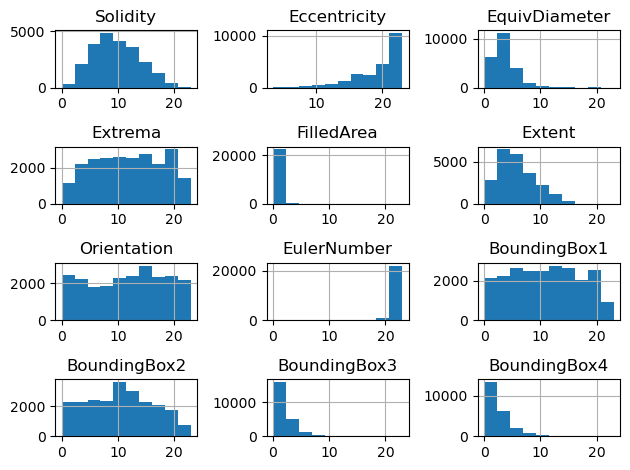

In [19]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[:12]].hist()
plt.tight_layout()

<Figure size 2200x2000 with 0 Axes>

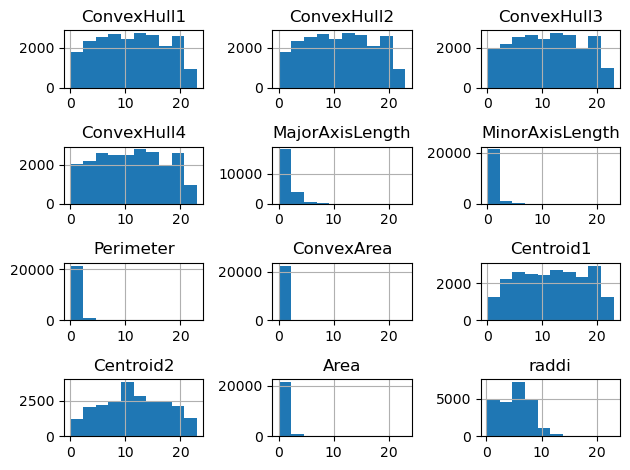

In [20]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[12:]].hist()
plt.tight_layout()

We notice that the distribution of features is rarely standart, as well, some parameters take smaller values, then others. As the distribution is not Gaussian and we have outliers Standart scaler won't probably give good results.

### Corellation matrix

<Axes: >

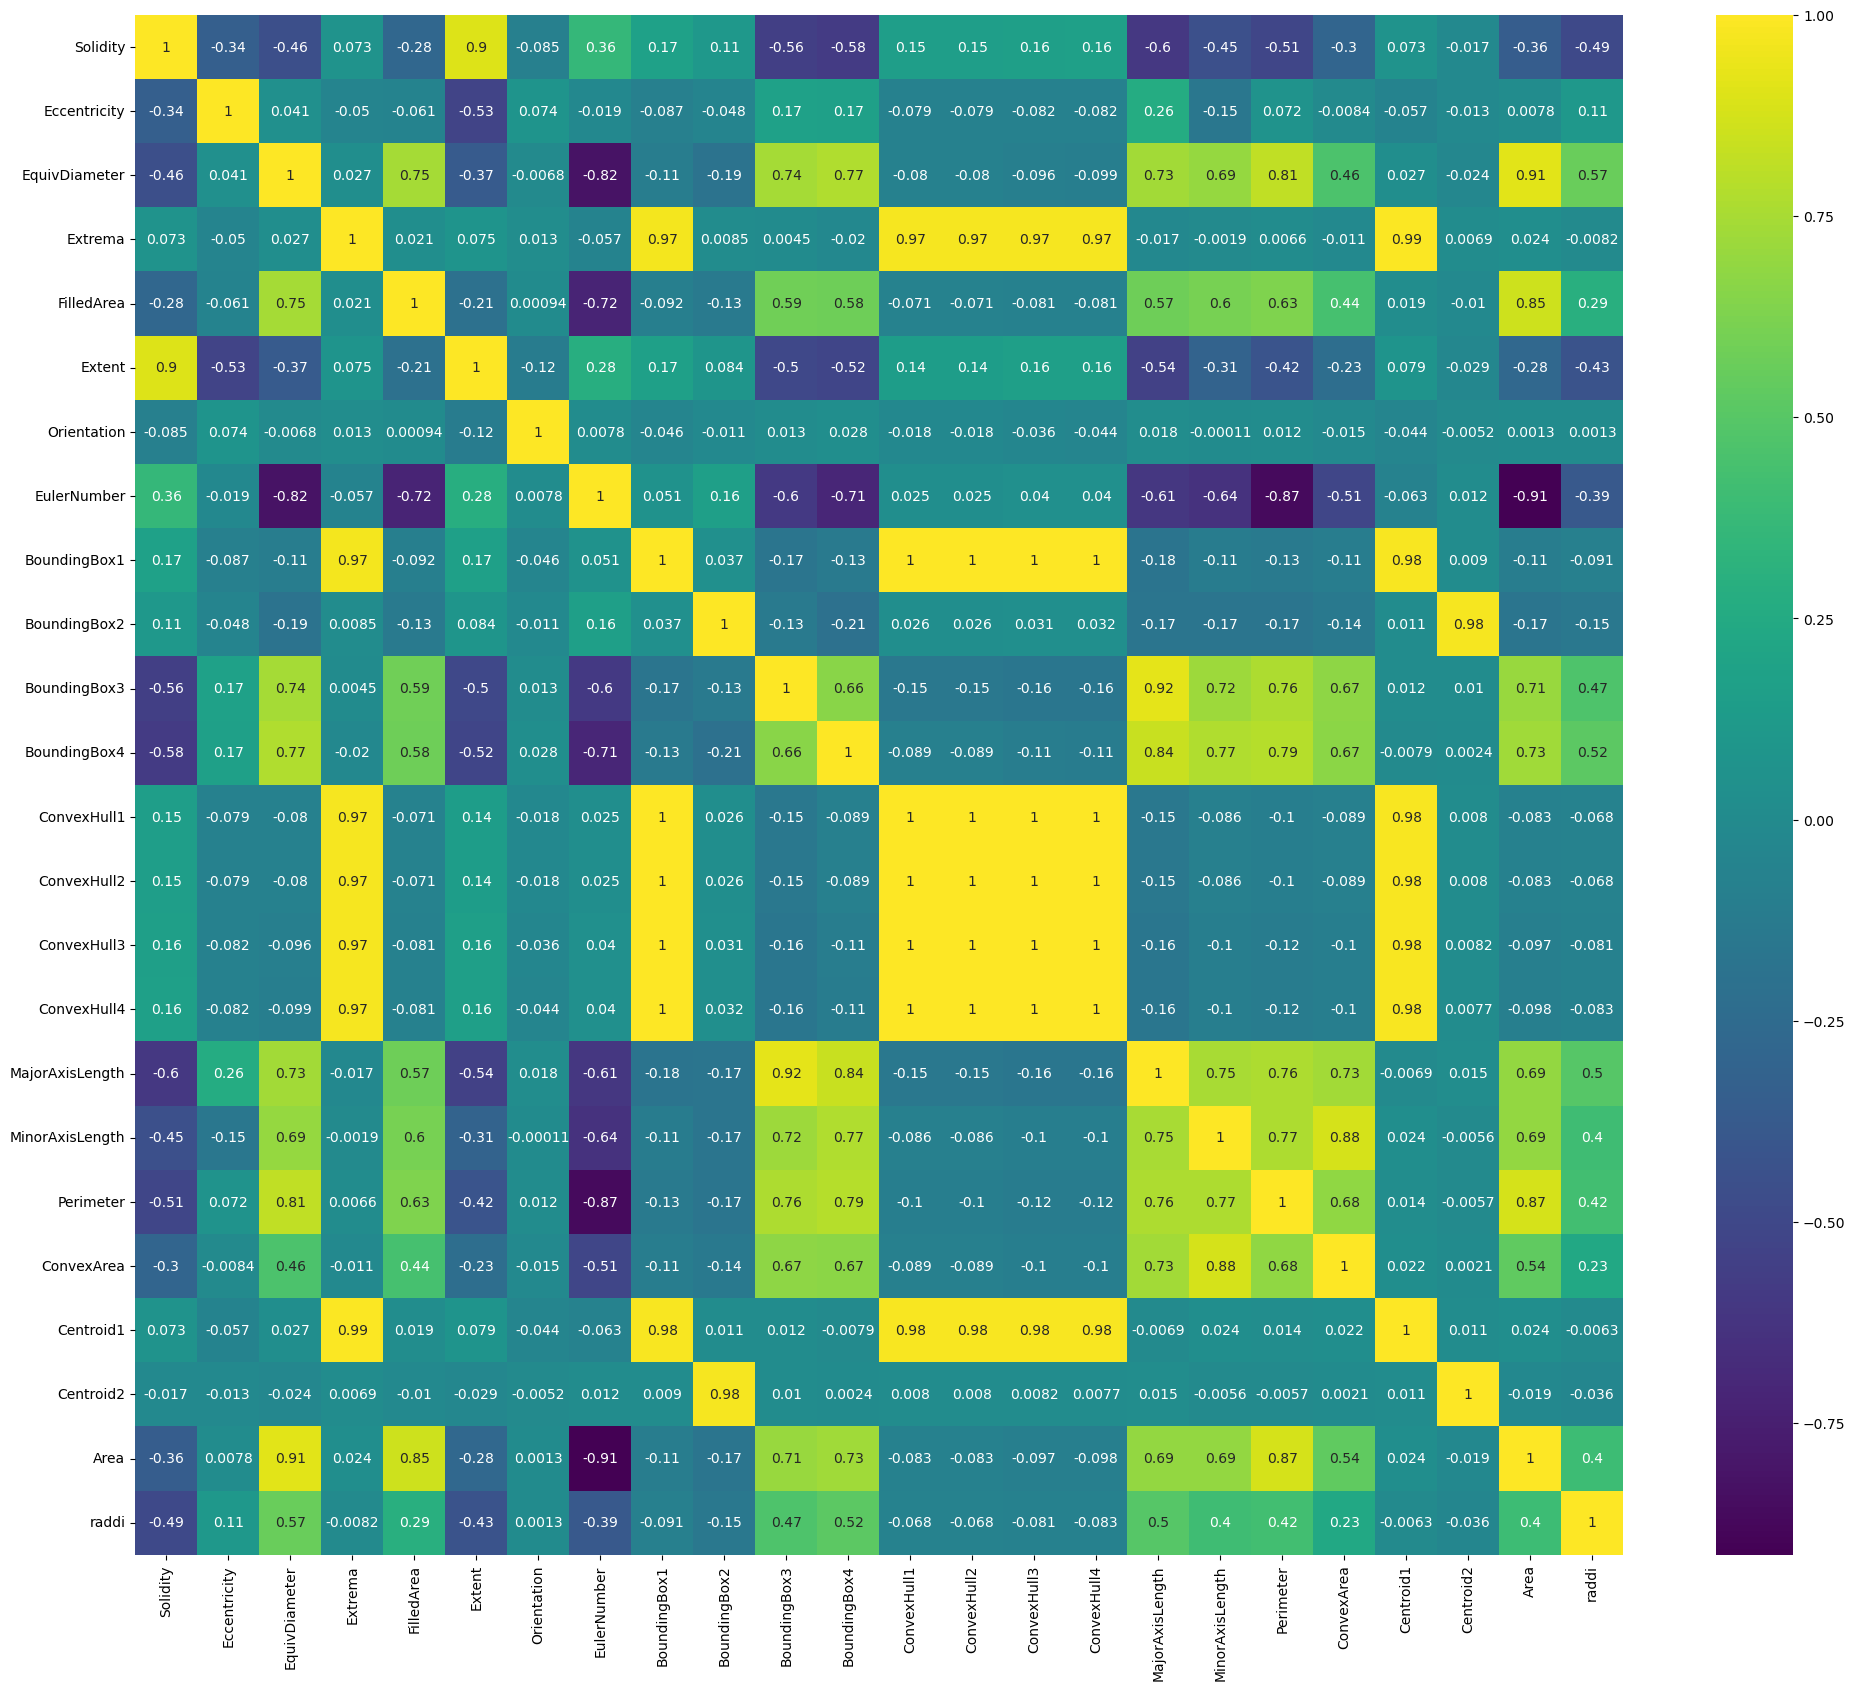

In [21]:
matrix = x_train.corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)

Correlation coef = 1 is suspicuos, so we will look at these columns closer.

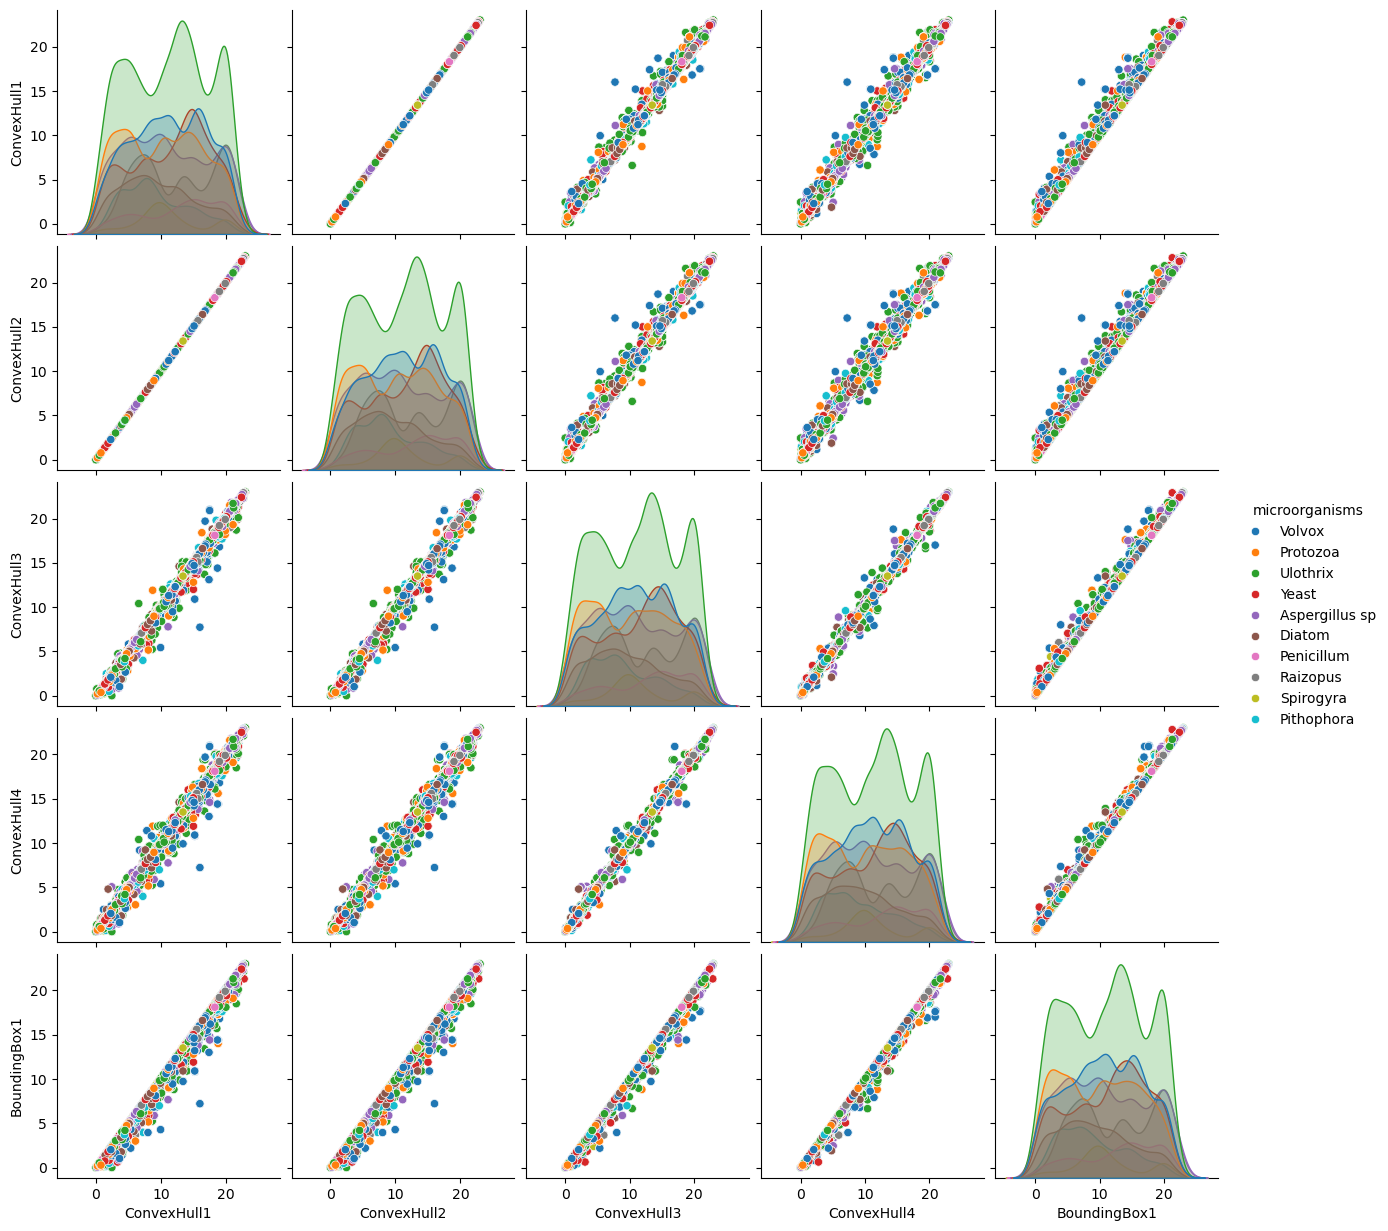

In [22]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'BoundingBox1']],
        hue='microorganisms',
        )
plt.show()

The linear dependence for all selected features is obvious, but the most strange dependence is between ConvexHull1 and ConvexHull2, so we want to compare these columns.

In [23]:
convex_hull_array = np.array(df[['ConvexHull1', 'ConvexHull2']])
print(np.sum(np.diff(convex_hull_array)))

0.0


As the difference between the entries of the ConvexHull1 and ConvexHull2 is equal to 0, we conclude that ConvexHull1=ConvexHull2 and delete this feature from data set (train and test data).

In [24]:
x_train.drop(columns='ConvexHull2', inplace=True)
x_train.rename(columns={'ConvexHull3': 'ConvexHull2', 'ConvexHull4': 'ConvexHull3'}, inplace=True)

x_test.drop(columns='ConvexHull2', inplace=True)
x_test.rename(columns={'ConvexHull3': 'ConvexHull2', 'ConvexHull4': 'ConvexHull3'}, inplace=True)


In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22852 entries, 1026 to 563
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         22852 non-null  float64
 1   Eccentricity     22852 non-null  float64
 2   EquivDiameter    22852 non-null  float64
 3   Extrema          22852 non-null  float64
 4   FilledArea       22852 non-null  float64
 5   Extent           22852 non-null  float64
 6   Orientation      22852 non-null  float64
 7   EulerNumber      22852 non-null  float64
 8   BoundingBox1     22852 non-null  float64
 9   BoundingBox2     22852 non-null  float64
 10  BoundingBox3     22852 non-null  float64
 11  BoundingBox4     22852 non-null  float64
 12  ConvexHull1      22852 non-null  float64
 13  ConvexHull2      22852 non-null  float64
 14  ConvexHull3      22852 non-null  float64
 15  MajorAxisLength  22852 non-null  float64
 16  MinorAxisLength  22852 non-null  float64
 17  Perimeter       

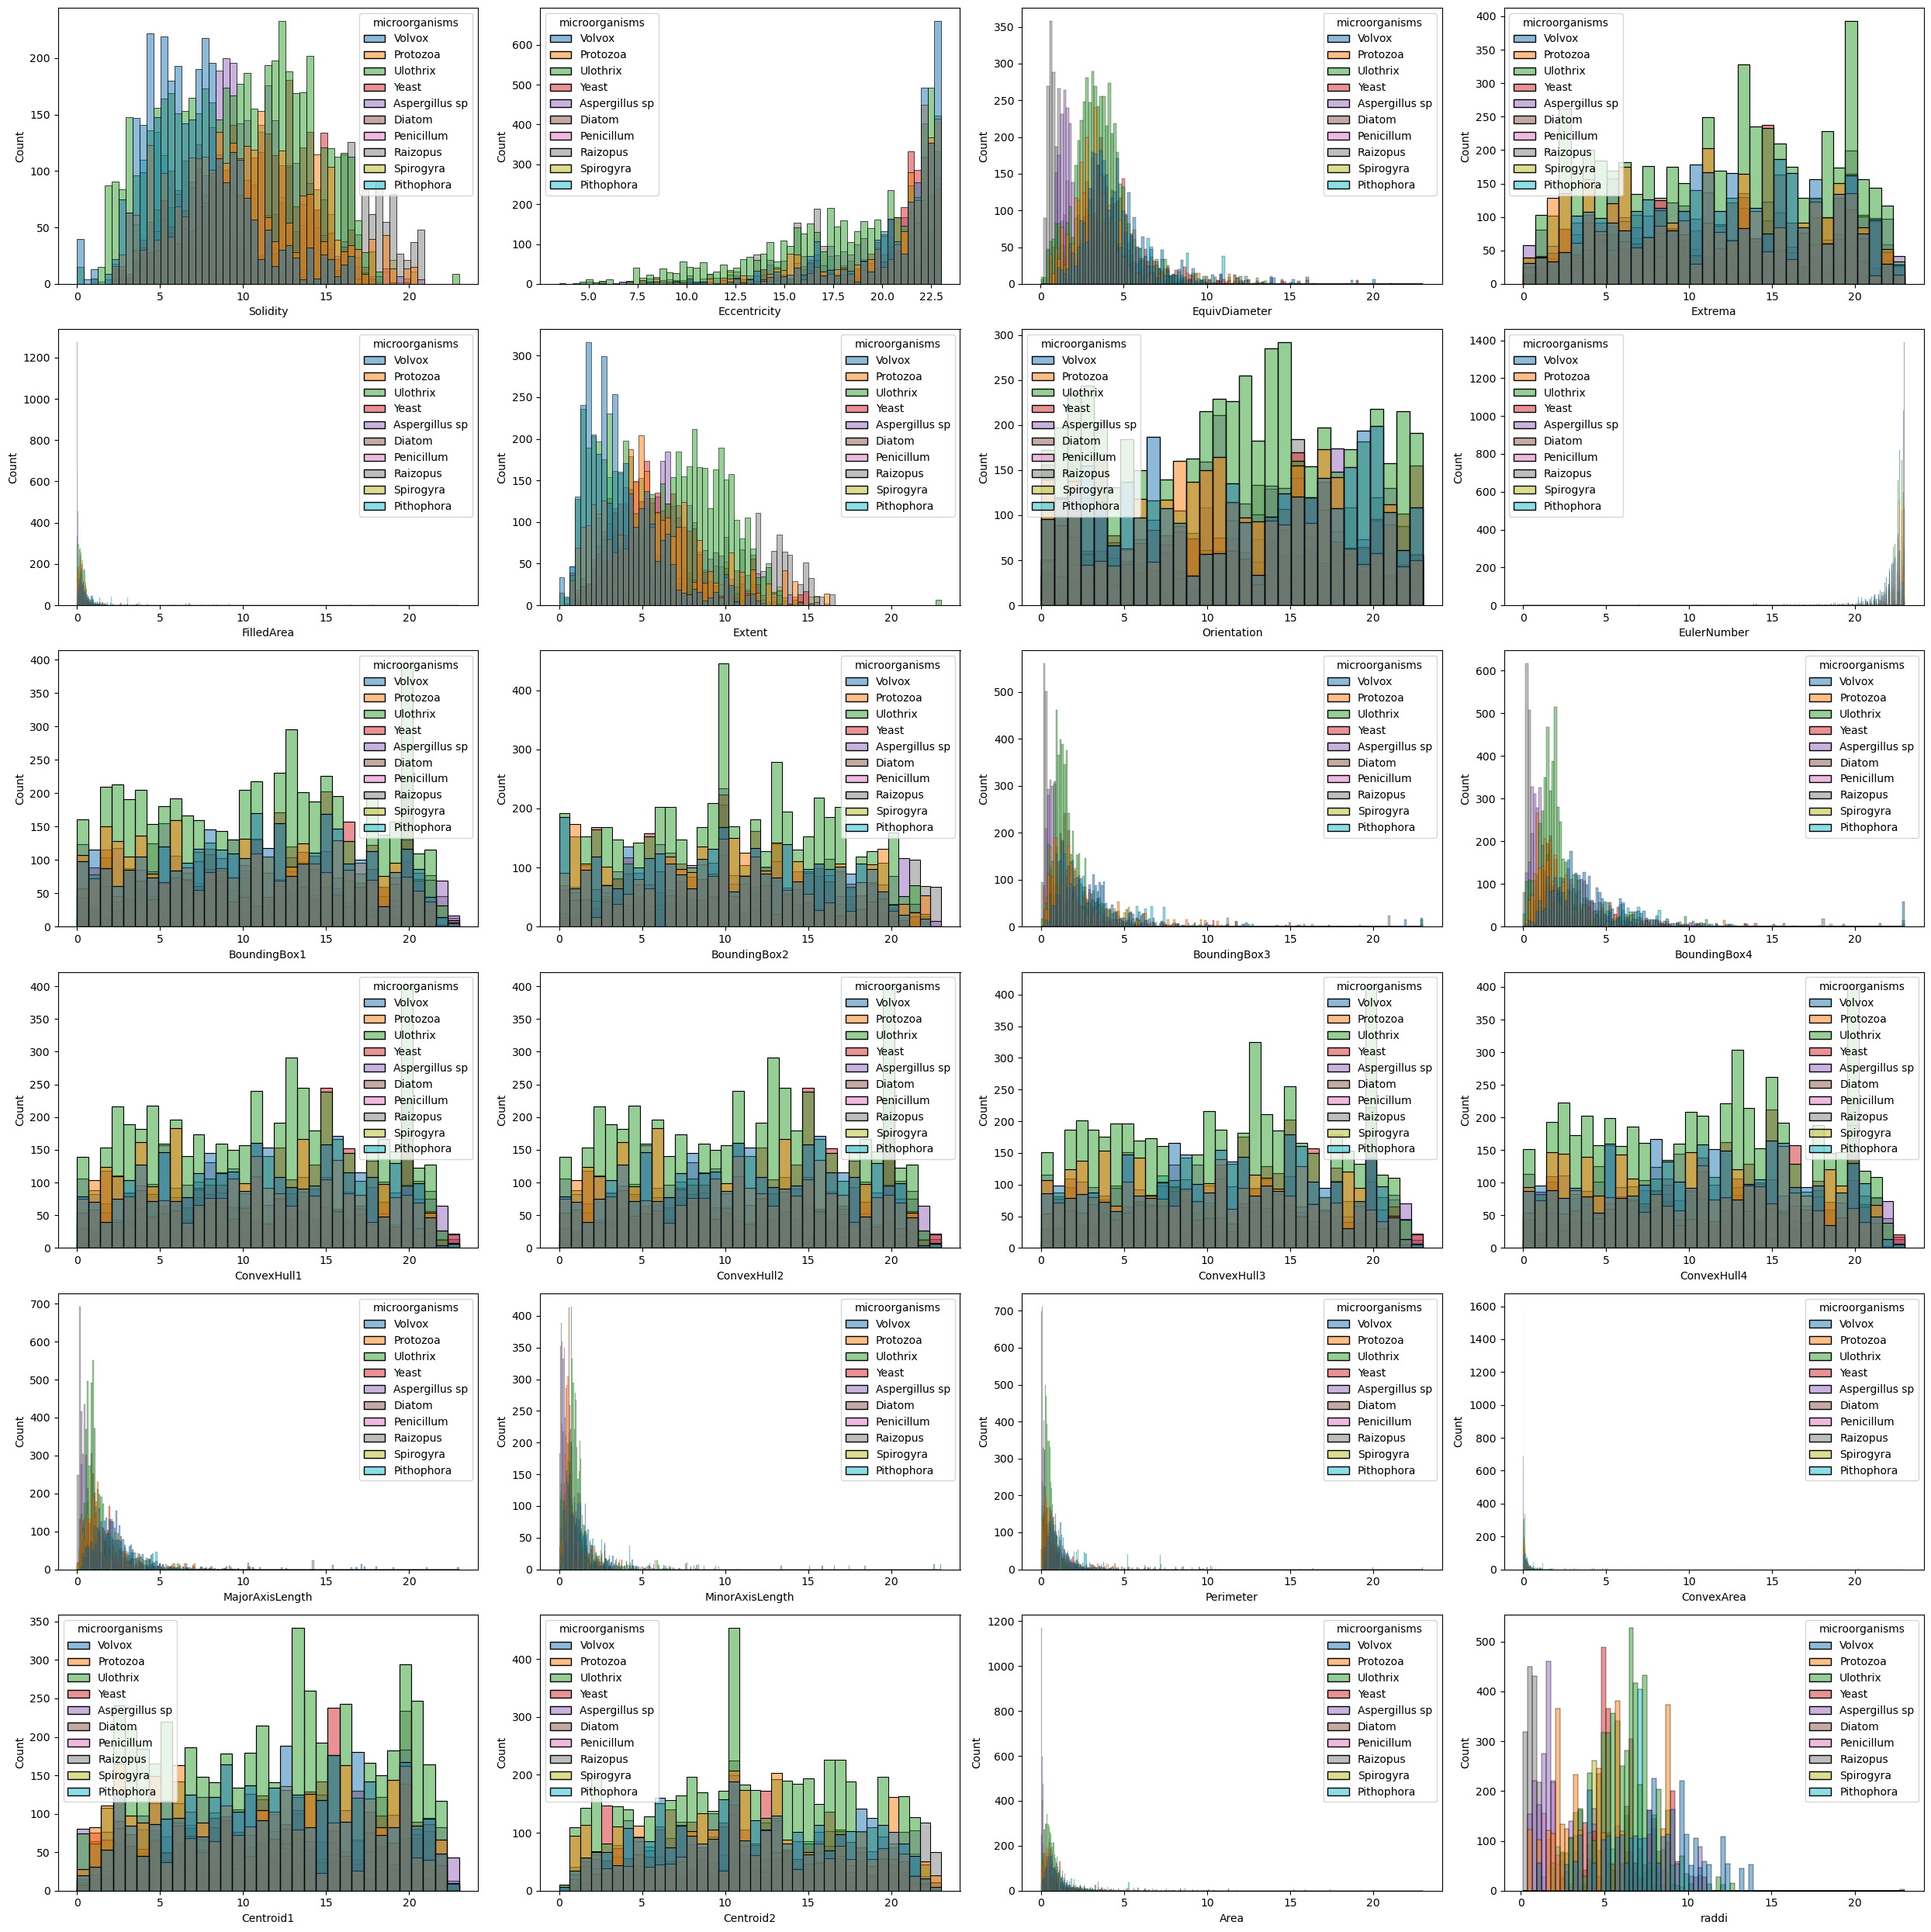

In [26]:
fig, ax = plt.subplots(6, 4, figsize=(25, 25))

for name, a in zip(train_df.columns[:-1], ax.ravel()):
  sns.histplot(data=train_df, x=name, hue="microorganisms", ax=a)

plt.tight_layout()
plt.show()

### Conclusion of EDA

We acknowledge the following problems:
1. The data set is highly imbalanced with the smallest class containing roughly 2% of data. However despite this fact we don't want to simplify the problem to binary classification or to classification of 2-3 biggest classes and will stick to multiclass classification of all given classes.
2. The data set contains outliers and is not standardised. We will use different transformers to shift and scale each feature in a suitable way.
3. The data set contains a huge amount of duplicates. However deleting them influences the distribution of the data among classes, so we don't decide to delete duplicates in advance and will study the behaviour of models with/without duplicates. 
4. The data set contains several columns with linear dependence. This issue as well will be a subject of study during modelling.

### Data transformation

As data contains outliers and features take different range of values we will transform data before modelling. 

For MinMaxScaler min and max parameters are different for each feature and depend on mean and std of this feature.

In [27]:
min_max_ranges = {}

for feature in x_train:
   min = mean[feature] - 3*std[feature]
   if min < 0:
      min = 0
   max = mean[feature] + 3*std[feature]
   min_max_ranges[feature] = (min, max)


After calculating min and max parameters for each feature we fit and transform train data and only transform test data.

In [28]:
from sklearn.preprocessing import MinMaxScaler

min_max_x_train = pd.DataFrame(index=x_train.index)
min_max_x_test = pd.DataFrame(index=x_test.index)

for feature, (min_val, max_val) in min_max_ranges.items():
    scaler = MinMaxScaler(feature_range=(min_val, max_val))
    min_max_x_train[feature] = scaler.fit_transform(x_train[[feature]])
    min_max_x_test[feature] = scaler.transform(x_test[[feature]])



We can do boxplots to look at transformed data.

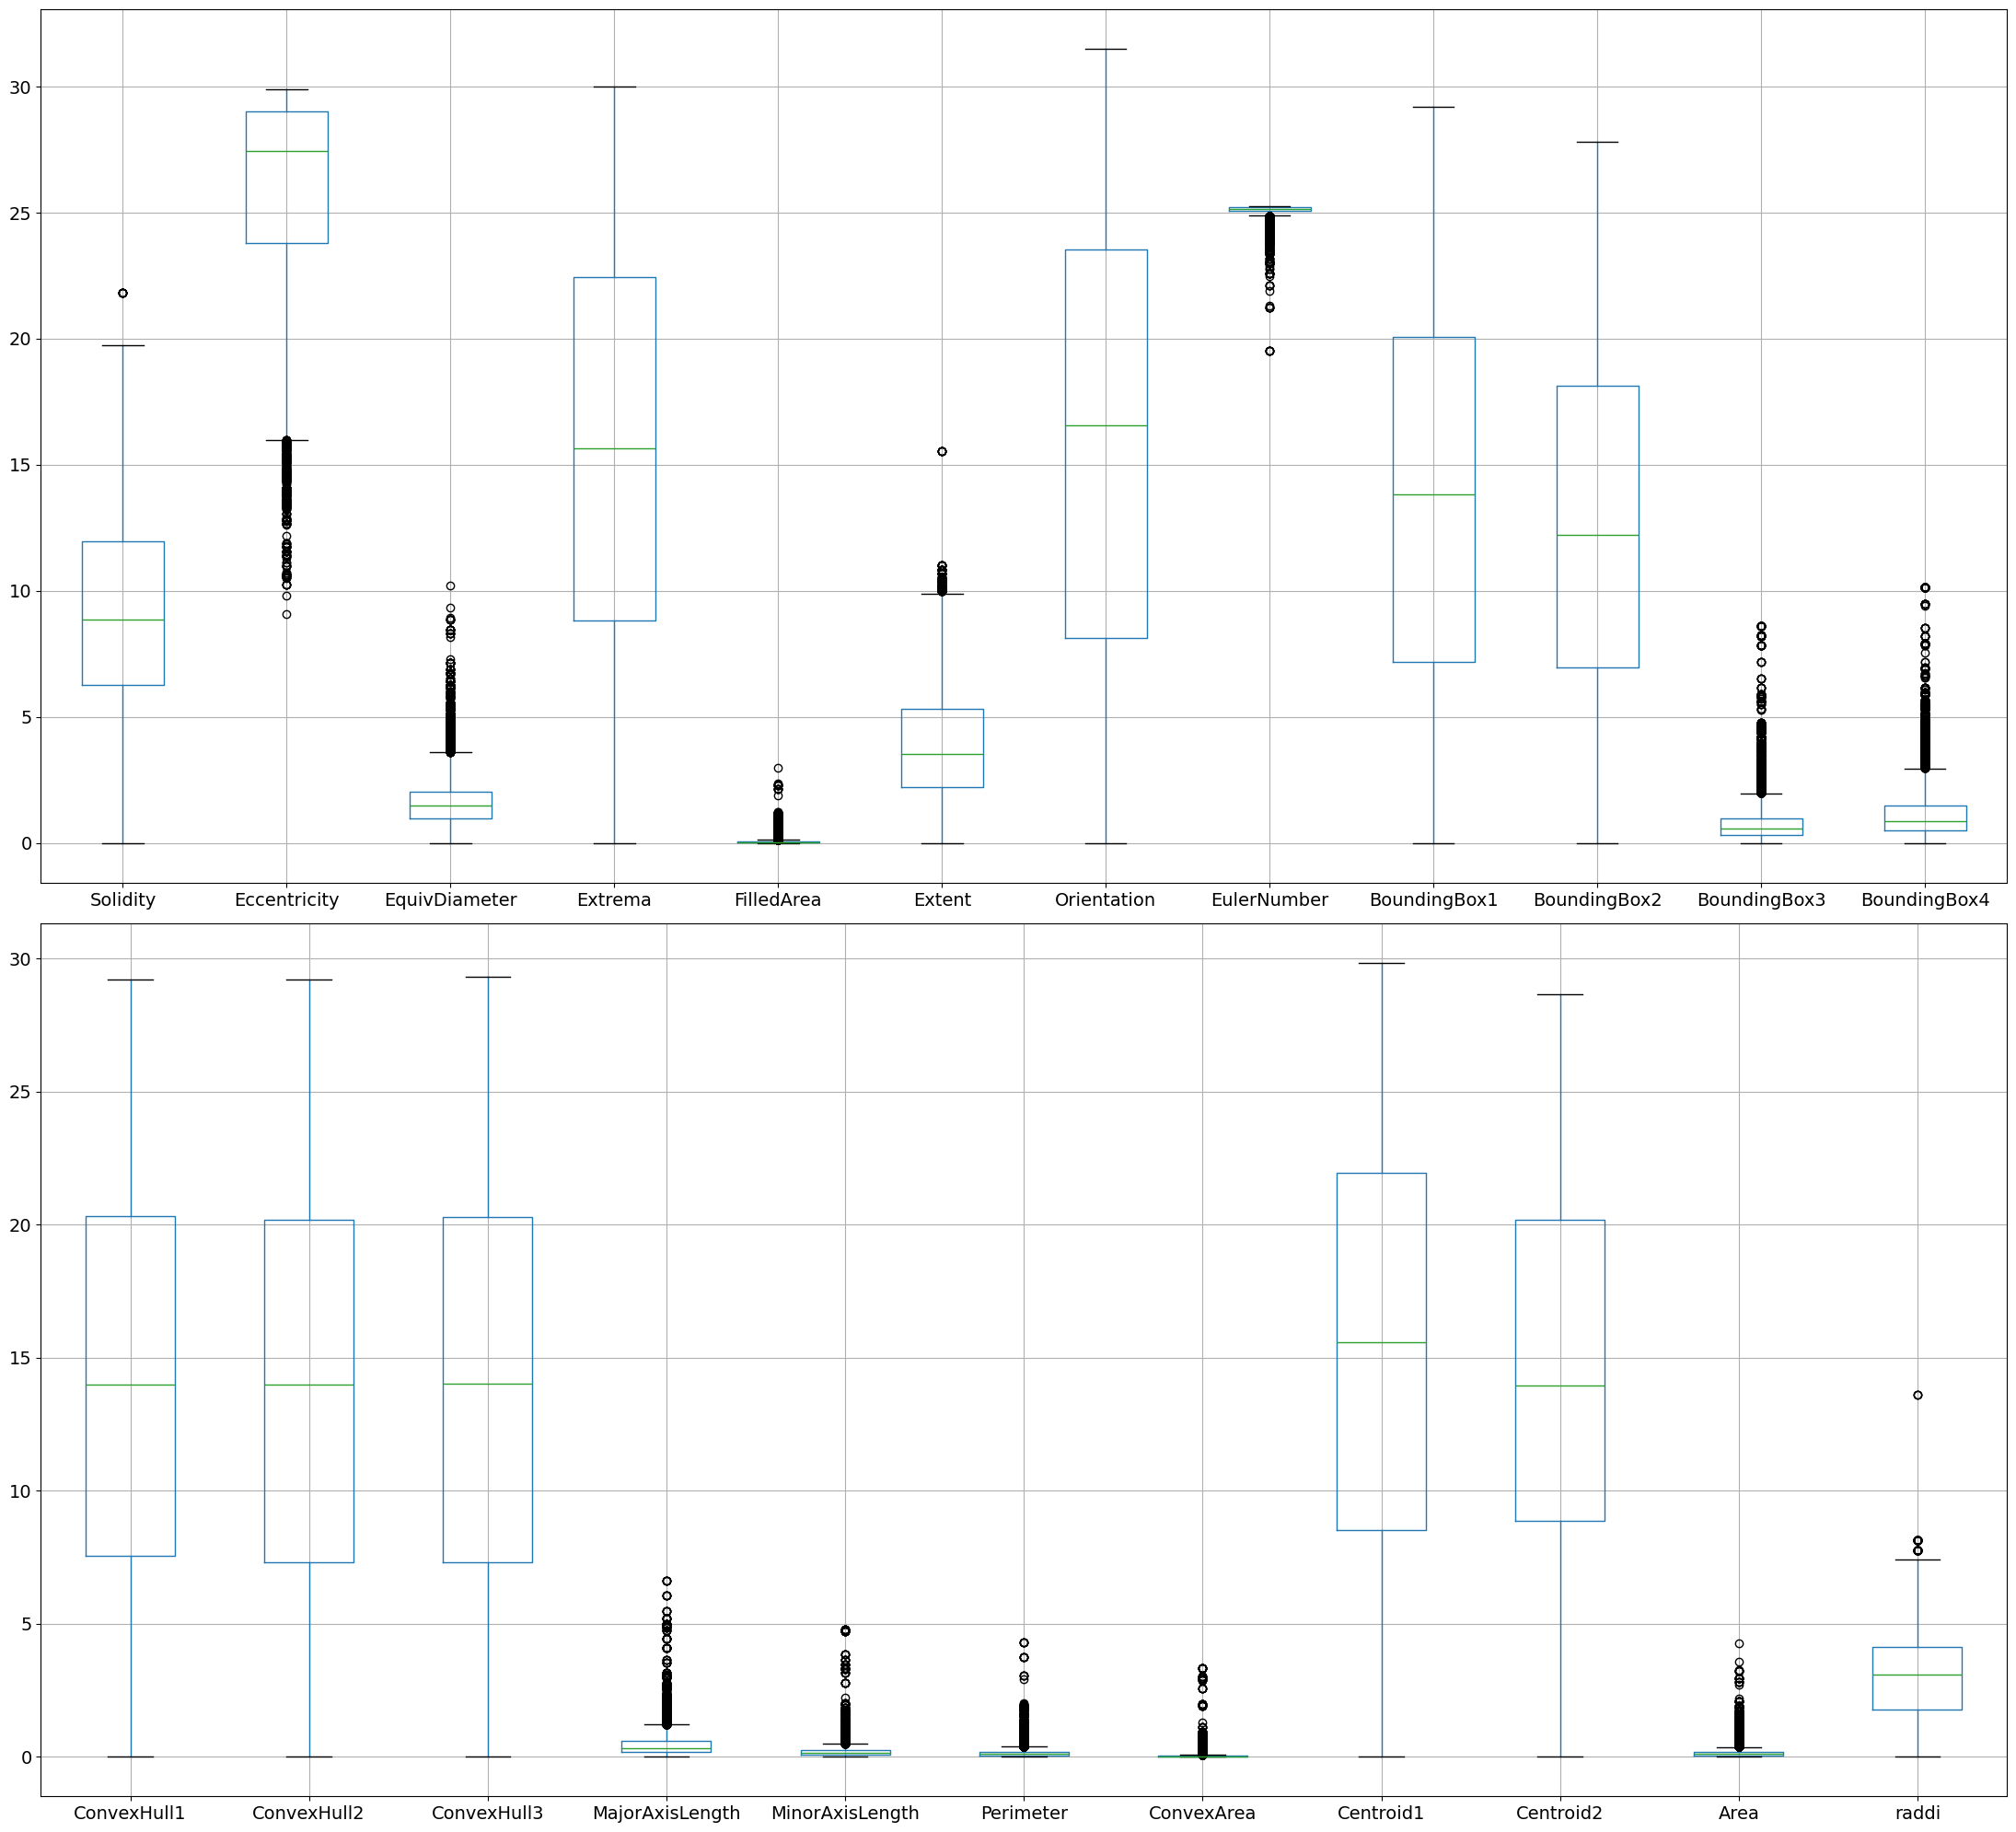

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
min_max_x_train.boxplot(ax=ax1, column=list(min_max_x_train.columns)[:12], fontsize=14)
min_max_x_train.boxplot(ax=ax2, column=list(min_max_x_train.columns)[12:], fontsize=14)
plt.tight_layout()

We see that the outliers were scaled as it is supposed to work.

In [30]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()

robust_x_train = pd.DataFrame(robust.fit_transform(x_train))
robust_x_test = pd.DataFrame(robust.transform(x_test))



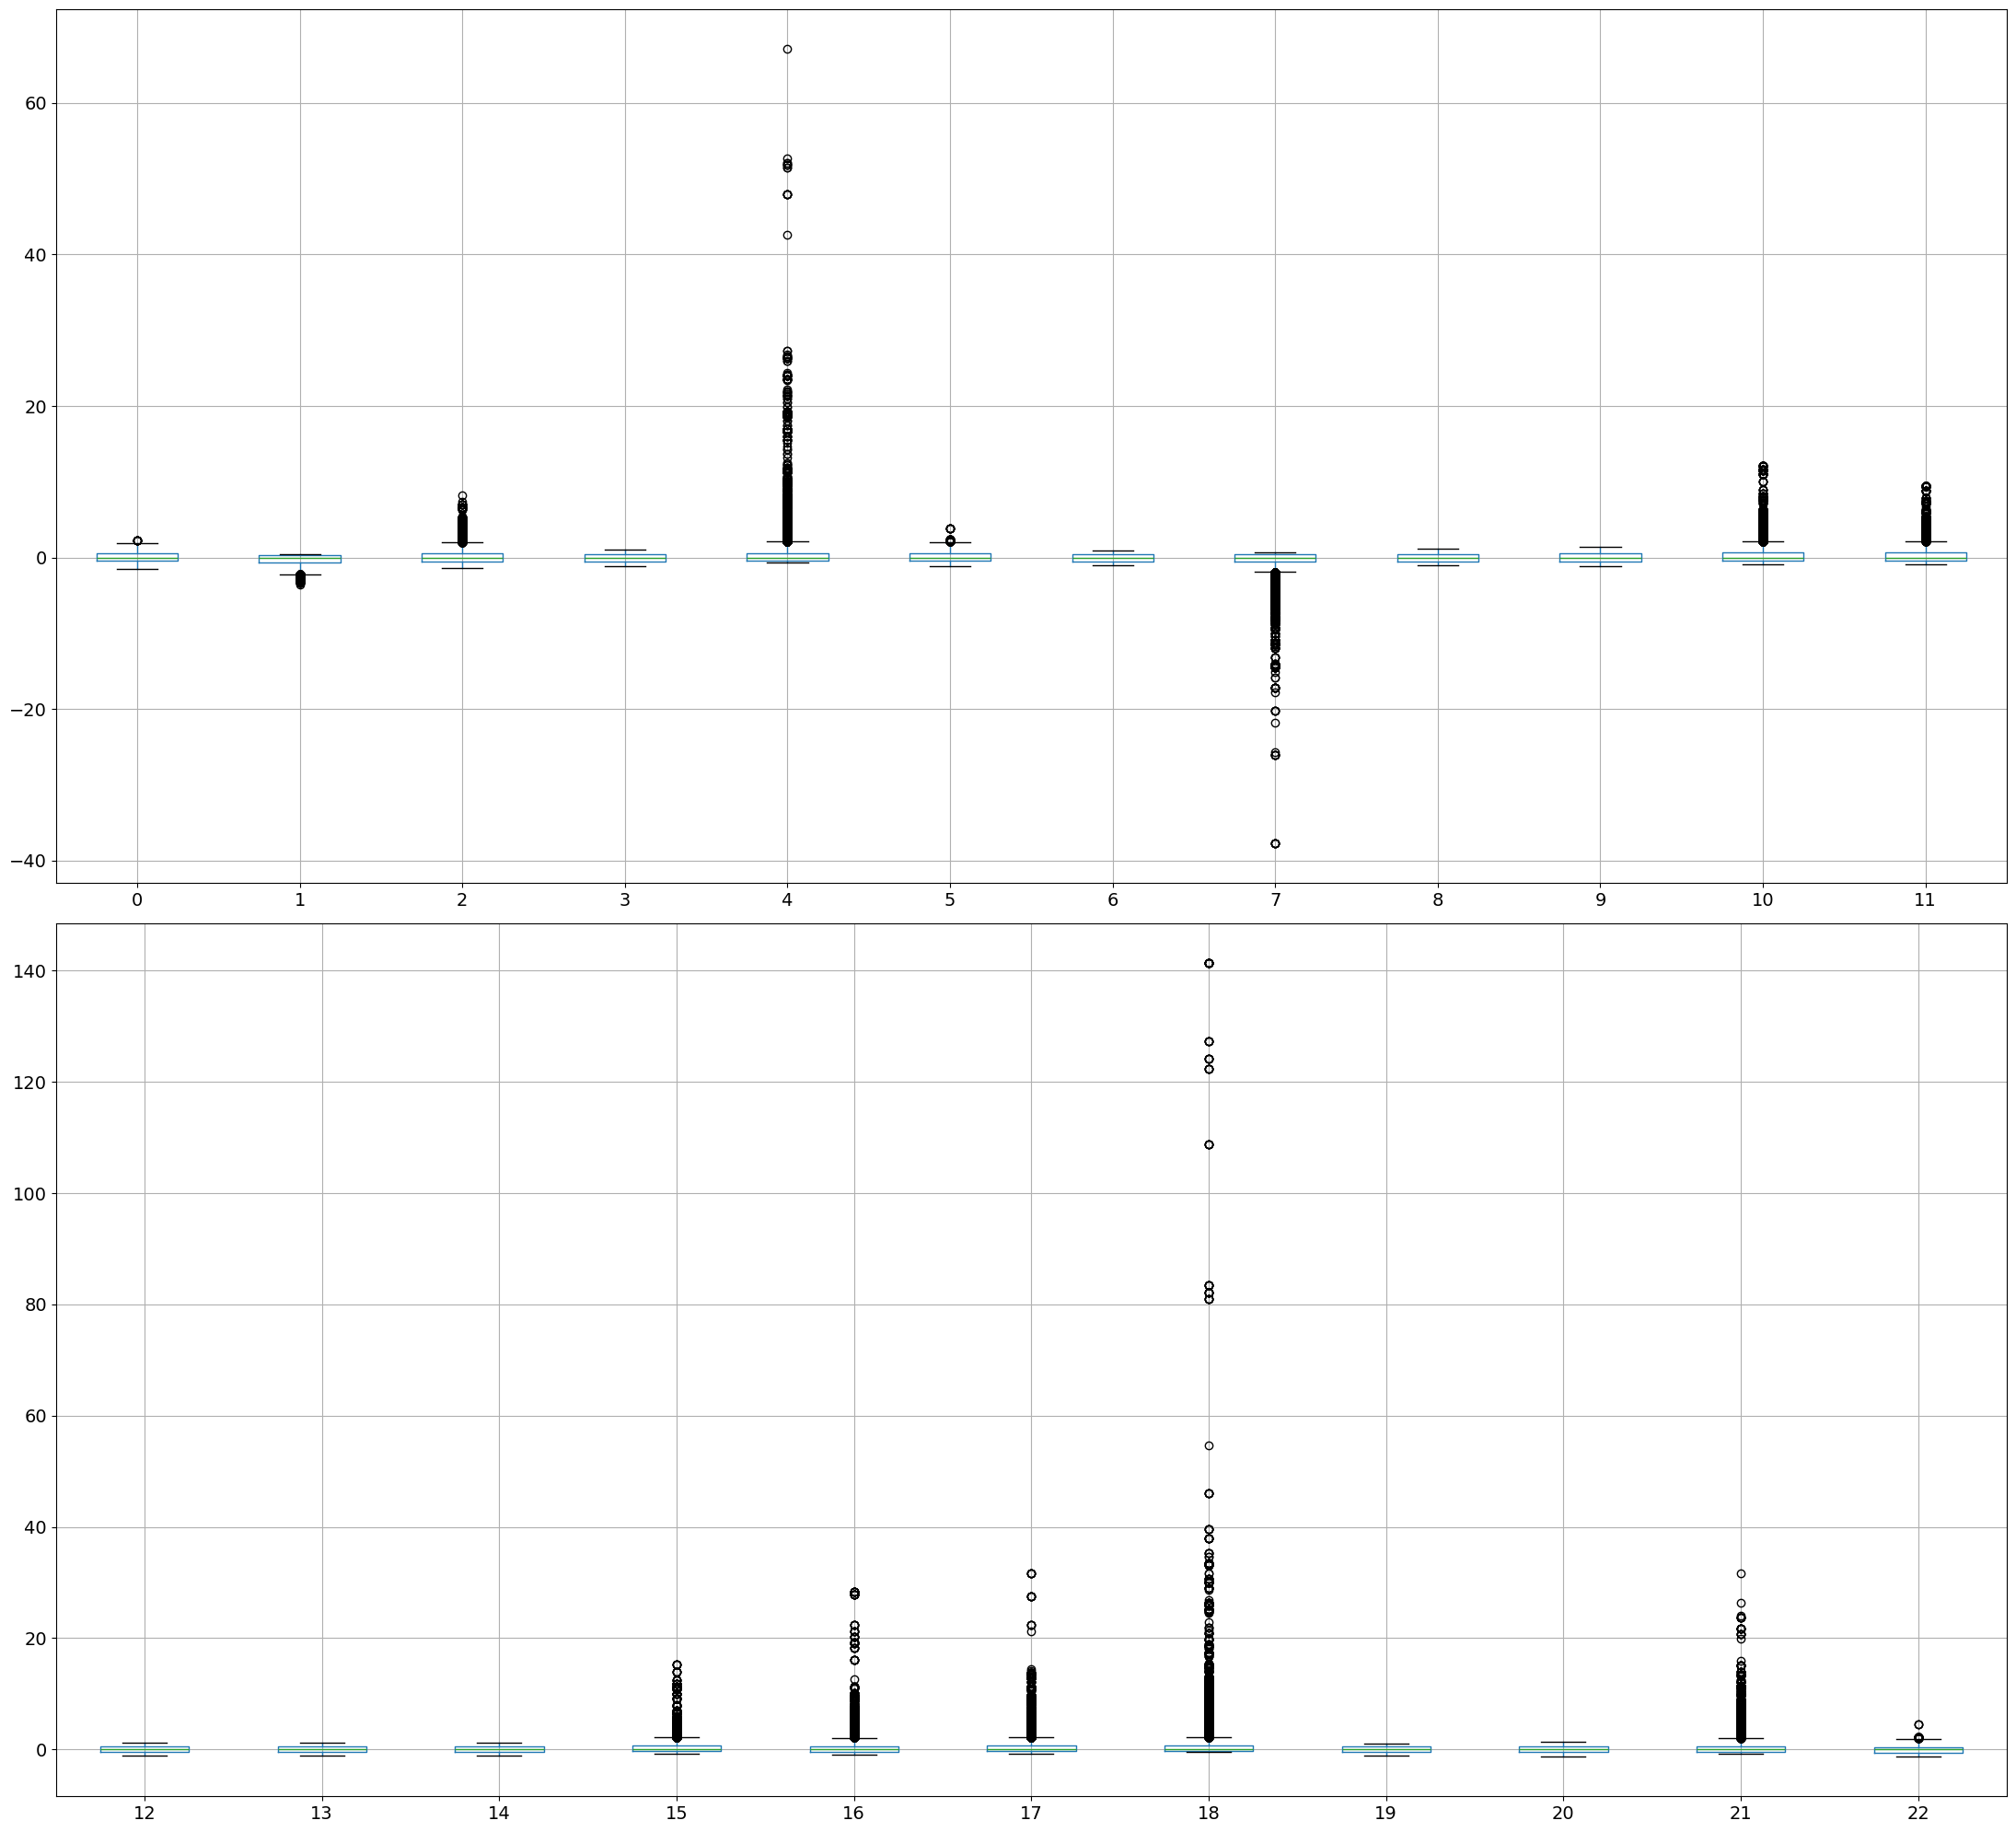

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
robust_x_train.boxplot(ax=ax1, column=list(robust_x_train.columns)[:12], fontsize=14)
robust_x_train.boxplot(ax=ax2, column=list(robust_x_train.columns)[12:], fontsize=14)
plt.tight_layout()

### Quick-and-dirty modelling

Firstly we will try models with default parameters and then will tune them.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


neigh = KNeighborsClassifier(n_neighbors=5) #default parameter
skf = StratifiedKFold(n_splits=5)
scores = cross_validate(neigh,
                        min_max_x_train,
                        y_train,
                        cv=skf, 
                        return_train_score=True)

print(scores)
print()
print('mean train score =', scores['train_score'].mean())
print()
print('mean test score =', scores['test_score'].mean())


{'fit_time': array([0.02006197, 0.03500009, 0.01653576, 0.01899838, 0.02007651]), 'score_time': array([0.44898057, 0.28191352, 0.2838788 , 0.28519058, 0.29792309]), 'test_score': array([0.8842704 , 0.87158171, 0.87549234, 0.88052516, 0.88818381]), 'train_score': array([0.93922652, 0.93681965, 0.93676841, 0.93572913, 0.93939394])}

mean train score = 0.9375875292218374

mean test score = 0.8800106848091407


In [33]:
neigh = KNeighborsClassifier(n_neighbors=5) #default parameter
skf = StratifiedKFold(n_splits=5)
scores = cross_validate(neigh,
                        robust_x_train,
                        y_train,
                        cv=skf, 
                        return_train_score=True)

print(scores)
print()
print('mean train score =', scores['train_score'].mean())
print()
print('mean test score =', scores['test_score'].mean())

{'fit_time': array([0.02001762, 0.01791859, 0.01599789, 0.01600623, 0.01594305]), 'score_time': array([0.36898017, 0.28708982, 0.28098917, 0.30491638, 0.29308224]), 'test_score': array([0.8879895 , 0.8917086 , 0.87811816, 0.8940919 , 0.89824945]), 'train_score': array([0.94327444, 0.94283683, 0.93944864, 0.94234766, 0.94557488])}

mean train score = 0.942696489566383

mean test score = 0.8900315230592255
